##DESCRIPTION

You've been asked to perform data analysis of service request (311) calls from New York City.
You've also been asked to utilize data wrangling techniques to understand the pattern in the
data and visualize the major types of complaints.


In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#IMPORT DATASET
data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#printing head of dataset
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
#printing tail of dataset
data.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"
300697,30281825,03/29/2015 12:33:01 AM,03/29/2015 04:41:50 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)"


In [5]:
data.shape

(300698, 53)

In [6]:
from datetime import date,time,datetime

In [7]:
data['Created Date'] = data['Created Date'].astype('datetime64[ns]')
data['Closed Date'] = data['Closed Date'].astype('datetime64[ns]')

In [8]:
data['time_diff'] = data['Closed Date']-data['Created Date']
data['ressolution_time'] = (data['time_diff'].astype('timedelta64[s]'))/(60*60)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 55 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      300698 non-null  int64          
 1   Created Date                    300698 non-null  datetime64[ns] 
 2   Closed Date                     298534 non-null  datetime64[ns] 
 3   Agency                          300698 non-null  object         
 4   Agency Name                     300698 non-null  object         
 5   Complaint Type                  300698 non-null  object         
 6   Descriptor                      294784 non-null  object         
 7   Location Type                   300567 non-null  object         
 8   Incident Zip                    298083 non-null  float64        
 9   Incident Address                256288 non-null  object         
 10  Street Name                     256288 non-n

In [10]:
##CHECKING FOR MISSING VALUE
data.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [11]:
percentage_of_missing_values = (data.isna().sum(axis=0)/data.shape[0])*100 
percentage_of_missing_values

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.719659
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.966757
Location Type                       0.043565
Incident Zip                        0.869643
Incident Address                   14.768971
Street Name                        14.768971
Cross Street 1                     16.388203
Cross Street 2                     16.554483
Intersection Street 1              85.414602
Intersection Street 2              85.579552
Address Type                        0.936155
City                                0.869311
Landmark                           99.883937
Facility Type                       0.721987
Status                              0.000000
Due Date                            0.000998
Resolution Description              0.000000
Resolution

In [12]:
def drop_columns_with_high_missing_percentage(data, threshold):
    
    
    ## Calculate the percentage of missing values in each column 
    missing_percentages = (data.isnull().sum() / len(data)) * 100
    
    
   ## Identify the columns where the percentage of missing values is greater than the threshold 
    columns_to_drop = missing_percentages[missing_percentages > threshold].index
    
    
    ## Drop the identified columns from the dataframe 
    data.drop(columns=columns_to_drop, inplace=True)
    
    
    ## Return the modified dataframe 
    return data

##Define the threshold for dropping columns 
threshold = 85

data = drop_columns_with_high_missing_percentage(data, threshold)



In [13]:
data.shape

(300698, 41)

In [14]:
(data.isnull().sum() / data.shape[0]*100).sort_values(ascending = False)

Cross Street 2                    16.554483
Cross Street 1                    16.388203
Street Name                       14.768971
Incident Address                  14.768971
Descriptor                         1.966757
Location                           1.177261
Longitude                          1.177261
Latitude                           1.177261
X Coordinate (State Plane)         1.177261
Y Coordinate (State Plane)         1.177261
Address Type                       0.936155
Incident Zip                       0.869643
City                               0.869311
Resolution Action Updated Date     0.727308
Facility Type                      0.721987
Closed Date                        0.719659
time_diff                          0.719659
ressolution_time                   0.719659
Location Type                      0.043565
Due Date                           0.000998
School Region                      0.000333
School Code                        0.000333
School Zip                      

In [15]:
#Removing all missing values
data = data.dropna(axis = 0,how='any')

In [16]:
data.isnull().sum()

Unique Key                        0
Created Date                      0
Closed Date                       0
Agency                            0
Agency Name                       0
Complaint Type                    0
Descriptor                        0
Location Type                     0
Incident Zip                      0
Incident Address                  0
Street Name                       0
Cross Street 1                    0
Cross Street 2                    0
Address Type                      0
City                              0
Facility Type                     0
Status                            0
Due Date                          0
Resolution Description            0
Resolution Action Updated Date    0
Community Board                   0
Borough                           0
X Coordinate (State Plane)        0
Y Coordinate (State Plane)        0
Park Facility Name                0
Park Borough                      0
School Name                       0
School Number               

In [17]:
data.shape

(245664, 41)

In [18]:
# City wise complains
data.columns


Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location',
       'time_diff', 'ressolution_time'],
      dtype='object')

In [19]:
data.City.unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'RIDGEWOOD',
       'HOWARD BEACH', 'STATEN ISLAND', 'OZONE PARK', 'FOREST HILLS',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'EAST ELMHURST',
       'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS', 'ROCKAWAY PARK',
       'SPRINGFIELD GARDENS', 'MASPETH', 'BAYSIDE', 'LONG ISLAND CITY',
       'GLEN OAKS', 'FAR ROCKAWAY', 'COLLEGE POINT', 'BELLEROSE',
       'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE', 'SUNNYSIDE',
       'WHITESTONE', 'ARVERNE', 'FLORAL PARK', 'NEW HYDE PARK',
       'BREEZY POINT', 'Astoria', 'Long Island City', 'Woodside',
       'East Elmhurst', 'Howard Beach'], dtype=object)

In [20]:
# DRAWING GRAPH FOR CITY WISE COMPLAIN

data['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Animal Abuse', 'Vending', 'Noise - Vehicle', 'Drinking',
       'Traffic', 'Noise - Park', 'Graffiti', 'Disorderly Youth'],
      dtype=object)

<AxesSubplot:title={'center':'CITY-WISE COMPLAINS'}, ylabel='CITIES'>

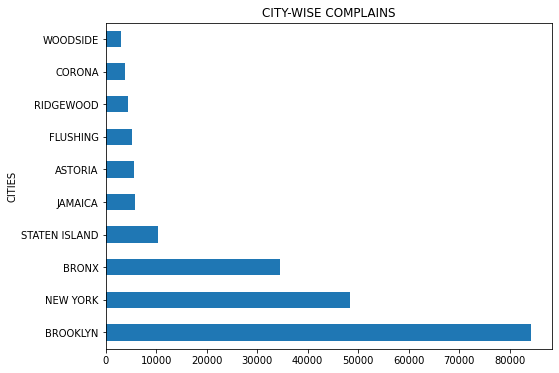

In [21]:
data['City'].value_counts().head(10).plot(kind='barh',figsize=(8,6),title='CITY-WISE COMPLAINS',ylabel='CITIES')

### Brooklyn has maximum number of complain followed by New York and Bronx

<AxesSubplot:title={'center':'Complain_type'}>

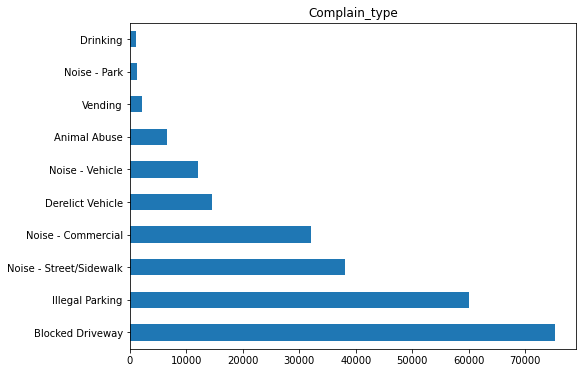

In [22]:
# Finding major type of complains 

data['Complaint Type'].value_counts().head(10).plot(kind='barh',figsize=(8,6),title='Complain_type')

### Blocked Driveway has the maximum number of complains 

In [23]:
# Display the types of complain in each city

cities = data['City'].value_counts().head(10).index.to_list()
pop_cities= data[data.City.isin(cities)]
data_mod= pd.crosstab(pop_cities['City'],pop_cities['Complaint Type'])
data_mod




Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Posting Advertisement,Traffic,Vending
City,,,,,,,,,,,,,,,
ASTORIA,110,2571,279,2,27,4,885,1145,16,25,282,126,0,14,31
BRONX,1254,12538,1607,47,152,8,6256,2145,55,214,7371,2553,12,64,242
BROOKLYN,2134,27711,4425,54,203,37,23235,10528,225,449,10721,3913,39,264,259
CORONA,59,2727,48,3,19,2,537,226,1,8,160,79,0,4,45
FLUSHING,128,2741,367,1,22,4,1486,158,2,15,129,78,1,13,25
JAMAICA,194,2757,781,5,25,3,1031,373,10,6,240,192,7,74,8
NEW YORK,1023,1923,426,35,243,14,9477,13336,139,418,16097,3589,35,269,1405
RIDGEWOOD,103,1627,263,2,7,2,1471,368,2,4,346,159,1,13,5
STATEN ISLAND,524,2103,1429,18,153,2,3974,585,10,20,643,239,514,51,18


### VISUALIZATION

<AxesSubplot:title={'center':'City-wise_Complains'}, xlabel='count', ylabel='City'>

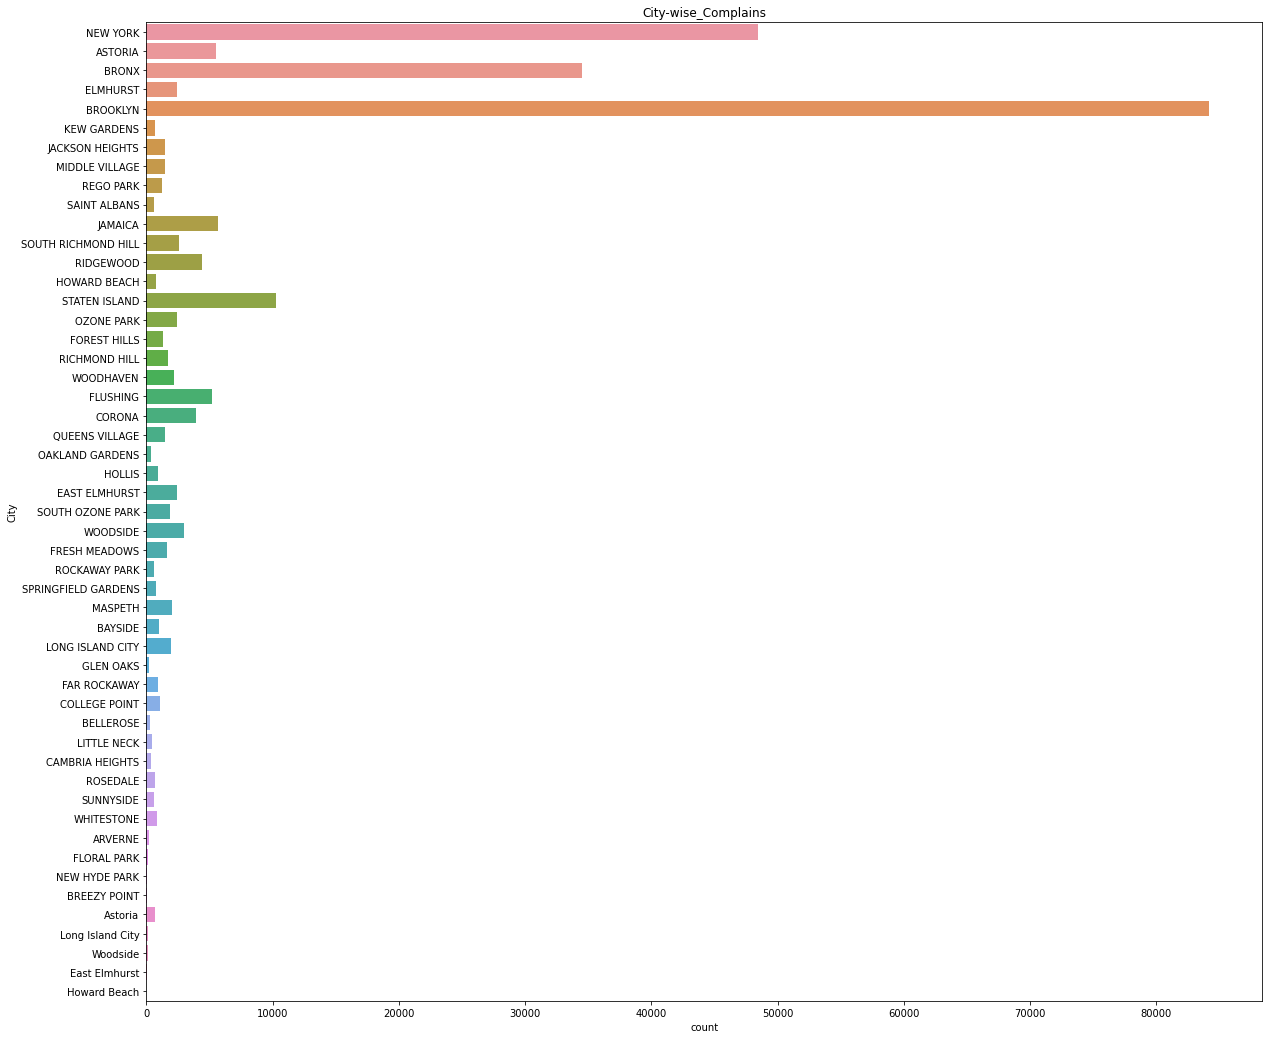

In [24]:
plt.figure(figsize=(20,18))
plt.title('City-wise_Complains')
sns.countplot(y='City',data = data)


<AxesSubplot:title={'center':'complaint coiunt in BROOKLYN'}>

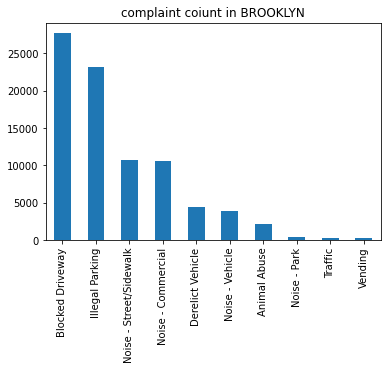

In [25]:

data_brok = data.loc[data['Borough']=='BROOKLYN']
data_brok['Complaint Type'].value_counts().head(10).plot(kind='bar',title='complaint coiunt in BROOKLYN')

In [28]:
data_brooklyn = data[data['Borough']=='BROOKLYN']

In [29]:
data_brooklyn.shape

(84197, 41)

<AxesSubplot:title={'center':'Concentration of Complains_Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

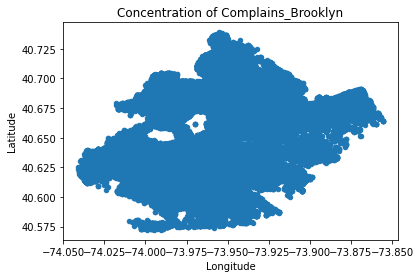

In [34]:
data_brooklyn[['Longitude','Latitude']].plot(kind='scatter',x='Longitude',y='Latitude',title = 'Concentration of Complains_Brooklyn')

<AxesSubplot:title={'center':'Concentration_of_Complains_Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

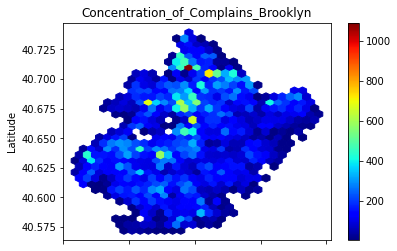

In [44]:
data_brooklyn.plot(kind='hexbin',x='Longitude',y='Latitude',gridsize=30,colormap='jet',
                   mincnt=1,title = 'Concentration_of_Complains_Brooklyn')

<AxesSubplot:xlabel='Complaint Type'>

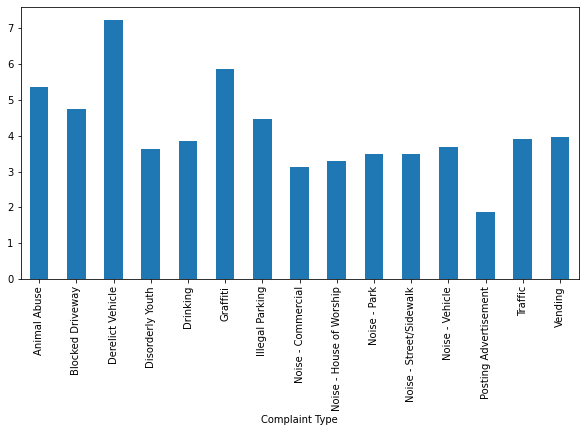

In [48]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.rcParams["figure.figsize"] = (10,5)

data.groupby("Complaint Type")["ressolution_time"].mean().plot.bar()

### 'Derelect Vehicle'takes maximum average time close the tickets

<AxesSubplot:xlabel='Location Type'>

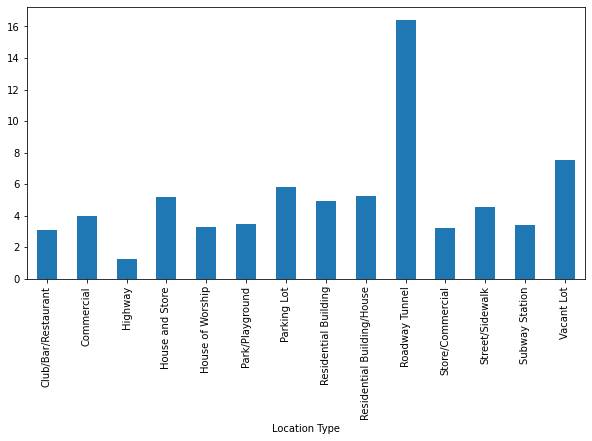

In [53]:
plt.rcParams["figure.figsize"] = (10,5)

data.groupby("Location Type")["ressolution_time"].mean().plot.bar()

In [ ]:
### 'Roadway Tunnel'